<h4 style="font-weight: bold; font-family: 'Times New Roman';">1 - Charger les dataset</h3>

In [10]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

filepath_1 = "dataset/monthly-beer-production-in-austr.csv"
# filepath_2 = "dataset/BTC-EUR.csv"
filepath_2 = "dataset/AirPassengers.csv"
filepath_3 = "dataset/weather_data_kolkata_2015_2020.csv"
filepath_4 = "dataset/monthly-sunspots.csv"
filepath_5 = "dataset/Electric_Production.csv"

ds_1 = pd.read_csv(filepath_1)
ds_2 = pd.read_csv(filepath_2)
ds_3 = pd.read_csv(filepath_3, nrows=500)
ds_4 = pd.read_csv(filepath_4, nrows=500)
ds_5 = pd.read_csv(filepath_5)


<h4 style="font-weight: bold; font-family: 'Times New Roman';">2 - Division des donnees</h3>
<h4 style="font-weight: bold; font-family: 'Times New Roman';">- 90% pour l'entrainement</h4>
<h4 style="font-weight: bold; font-family: 'Times New Roman';">- 10% pour le test</h4>

In [11]:
def seed(ds, percentage=90):
    return ds[:(percentage*len(ds)//100)]

train_set_1 = seed(ds_1)
test_set_1 = seed(ds_1, 10)
train_set_2 = seed(ds_2)
test_set_2 = seed(ds_2, 10)
train_set_3 = seed(ds_3)
test_set_3 = seed(ds_3, 10)
train_set_4 = seed(ds_4)
test_set_4 = seed(ds_4, 10)
train_set_5 = seed(ds_5)
test_set_5 = seed(ds_5, 10)

used_train_set_att = {'Monthly beer production': train_set_1, 'Airpass': train_set_2, 'TEMPERATURE': train_set_3, 'Sunspots': train_set_4, 'IPG2211A2N': train_set_5, }
used_test_set_att = {'Monthly beer production': test_set_1, 'Airpass': test_set_2, 'TEMPERATURE': test_set_3, 'Sunspots': test_set_4, 'IPG2211A2N': test_set_5, }

alpha_values = [0.5, 0.1, 0.9]
beta_values = gamma_values = alpha_values

<h3 style="font-weight: bold; font-family: 'Times New Roman';">A) <u>Lissage simple</u></h3>

In [12]:
def simple_exponential_smoothing(alpha):
    result_SEM = {}
    for ds in used_train_set_att:
        n = len(used_train_set_att[ds][ds])
        result = [used_train_set_att[ds][ds][0]]
        for i in range(1, n):
            result.append((1 - alpha)*used_train_set_att[ds][ds][i] + (alpha*result[i - 1]))
            
        result_SEM[ds] = result
    return result_SEM;
# print(f"{len(used_train_set_att['Airpass']['Airpass'])}, {len(simple_exponential_smoothing(0.1)['Airpass'])}")

<h3 style="font-family: 'Times New Roman'; font-weight: bold;">B) <u>Lissage exponentiel double</u><h3>

In [13]:
def double_exponential_smoothing(alpha, beta):
    results_DEM = {}
    for ds in used_train_set_att:
        n = len(used_train_set_att[ds][ds])
        level = [used_train_set_att[ds][ds][0]]
        trend = [used_train_set_att[ds][ds][1] - used_train_set_att[ds][ds][0]]
        result = [used_train_set_att[ds][ds][0]]
        
        for t in range(1, n):
            level.append(alpha*used_train_set_att[ds][ds][t] + (1 - alpha)*(level[t - 1] + trend[t - 1]))
            trend.append(beta*(level[t] - level[t - 1]) + (1 - beta)*trend[t - 1])
            result.append(level[t] + trend[t])
            
        results_DEM[ds] = result
    return results_DEM
# print(f"{len(used_train_set_att['Airpass']['Airpass'])}, {len(double_exponential_smoothing(0.1, 0.1)['Airpass'])}")

<h3 style="font-family: 'Times New Roman'; font-weight: bold;">C) <u>Holt-Winters non saisonnier</u><h3>

In [14]:
def holt_winters_non_seasonal(alpha, beta):
    results_HWNS = {}
    for ds in used_train_set_att:
        n = len(used_train_set_att[ds][ds])
        level = [used_train_set_att[ds][ds][0]]
        trend = [used_train_set_att[ds][ds][1] - used_train_set_att[ds][ds][0]]
        result = [used_train_set_att[ds][ds][0]]
        
        for t in range(1, n):
            level.append(alpha*used_train_set_att[ds][ds][t] + (1 - alpha)*(level[t - 1] + trend[t - 1]))
            trend.append(beta*(level[t] - level[t - 1]) + (1 - beta)*trend[t - 1])
            result.append(level[t] + trend[t])
            
        results_HWNS[ds] = result
    return results_HWNS

<h3 style="font-family: 'Times New Roman'; font-weight: bold;">D) <u>Holt-Winters saisonnier additif</u><h3>

In [15]:
def holt_winters_additive(alpha, beta, gamma, periods):
    results_HWSA = {}
    for ds in used_train_set_att:
        n = len(used_train_set_att[ds][ds])
        level = [used_train_set_att[ds][ds][0]]
        trend = [used_train_set_att[ds][ds][1] - used_train_set_att[ds][ds][0]]
        result = [used_train_set_att[ds][ds][0]]
        seasonality = [used_train_set_att[ds][ds][i] - used_train_set_att[ds][ds][0] for i in range(periods)]
        
        for t in range(1, n):
            level.append(alpha*(used_train_set_att[ds][ds][t] - seasonality[t % periods]) + (1 - alpha)*(level[t - 1] + trend[t - 1]))
            trend.append(beta*(level[t] - level[t - 1]) + (1 - beta)*trend[t - 1])
            seasonality.append(gamma*(used_train_set_att[ds][ds][t] - level[t]) + (1 - gamma)*seasonality[t % periods])
            result.append(level[t] + trend[t] + seasonality[t % periods])
            
        results_HWSA[ds] = result
    return results_HWSA

<h3 style="font-family: 'Times New Roman'; font-weight: bold;">E) <u>Holt-Winters saisonnier multiplicatif</u><h3>

In [16]:
def holt_winters_multiplicative(alpha, beta, gamma, periods):
    results_HWSM = {}
    for ds in used_train_set_att:
        n = len(used_train_set_att[ds][ds])
        level = [used_train_set_att[ds][ds][0]]
        trend = [used_train_set_att[ds][ds][1] - used_train_set_att[ds][ds][0]]
        result = [used_train_set_att[ds][ds][0]]
        seasonality = [used_train_set_att[ds][ds][i] / used_train_set_att[ds][ds][0] for i in range(periods)]
        
        for t in range(1, n):
            level.append(alpha*(used_train_set_att[ds][ds][t] / seasonality[t % periods]) + (1 - alpha)*(level[t - 1] + trend[t - 1]))
            trend.append(beta*(level[t] - level[t - 1]) + (1 - beta)*trend[t - 1])
            seasonality.append(gamma*(used_train_set_att[ds][ds][t] / level[t]) + (1 - gamma)*seasonality[t % periods])
            result.append((level[t] + trend[t])*seasonality[t % periods])
            
        results_HWSM[ds] = result
    return results_HWSM

<h4 style="font-weight: bold; font-family: 'Times New Roman';">3 - Calcul et representation des erreurs de prevision, determination du meilleur α</h4>

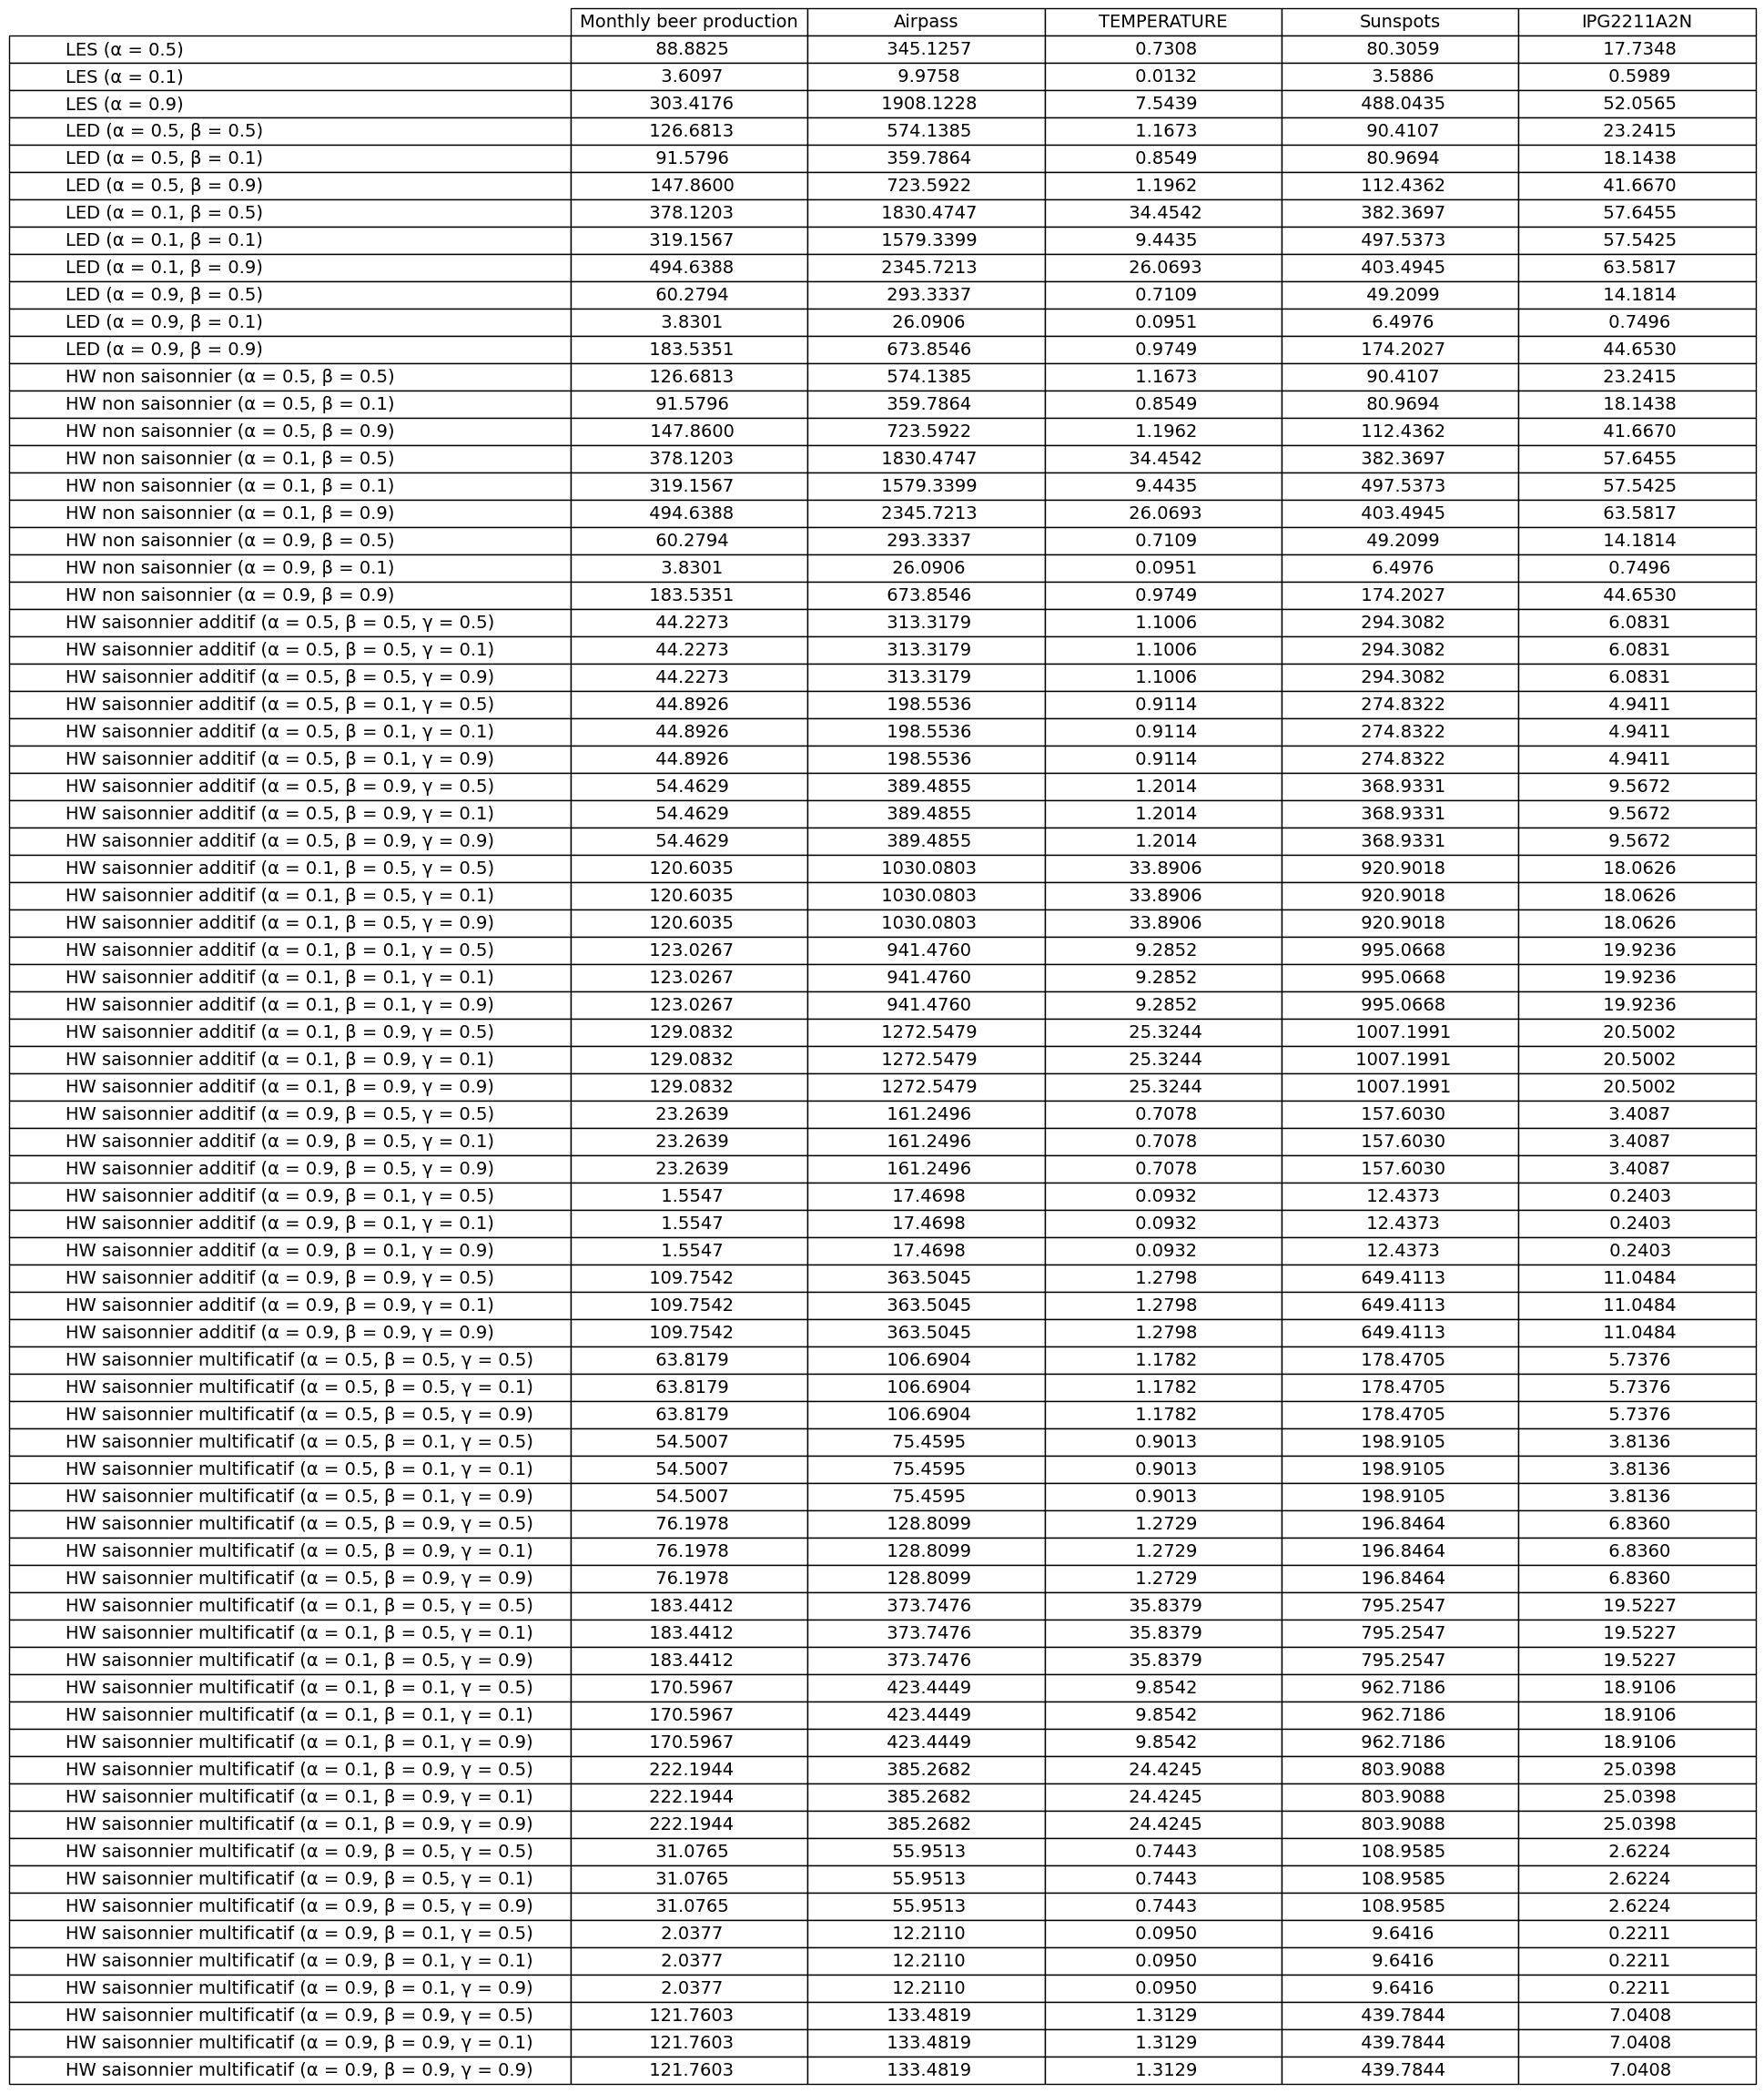

In [43]:
best_alpha_SEM = {}
best_alpha_DEM = {}
best_alpha_HWNS = {}
best_alpha_HWSA = {}
best_alpha_HWSM = {}
best_beta_DEM = {}
best_beta_HWNS = {}
best_beta_HWSA = {}
best_beta_HWSM = {}
best_gamma_HWSA = {}
best_gamma_HWSM = {}
best_alpha_forecasts_SEM = {}
best_alpha_forecasts_DEM = {}
best_alpha_forecasts_HWNS = {}
best_alpha_forecasts_HWSA = {}
best_alpha_forecasts_HWSM = {}
periods = 12
errors = []

for ds in used_train_set_att:
    min_error_SEM = min_error_DEM = min_error_HWNS = min_error_HWSA = min_error_HWSM = float('inf')
    ds_errors = {}
    for alpha in alpha_values:
        forecast_SEM = simple_exponential_smoothing(alpha);
        error_SEM = np.mean((np.array(used_train_set_att[ds][ds]) - np.array(forecast_SEM[ds]))**2)
        ds_errors[f"LES (α = {alpha})"] = error_SEM
        
        if (error_SEM < min_error_SEM):
            min_error_SEM = error_SEM
            best_alpha_SEM[ds] = alpha
            best_alpha_forecasts_SEM[ds] = forecast_SEM
            
    for alpha in alpha_values:
        for beta in beta_values:
            forecast_DEM = double_exponential_smoothing(alpha, beta);
            error_DEM = np.mean((np.array(used_train_set_att[ds][ds]) - np.array(forecast_DEM[ds]))**2)
            ds_errors[f"LED (α = {alpha}, β = {beta})"] = error_DEM
            
            if (error_DEM < min_error_DEM):
                min_error_DEM = error_DEM
                best_alpha_DEM[ds] = alpha
                best_beta_DEM[ds] = beta
                best_alpha_forecasts_DEM[ds] = forecast_DEM
                
    for alpha in alpha_values:
        for beta in beta_values:
            forecast_HWNS = holt_winters_non_seasonal(alpha, beta);
            error_HWNS = np.mean((np.array(used_train_set_att[ds][ds]) - np.array(forecast_HWNS[ds]))**2)
            ds_errors[f"HW non saisonnier (α = {alpha}, β = {beta})"] = error_HWNS
            
            if (error_HWNS < min_error_HWNS):
                min_error_HWNS = error_HWNS
                best_alpha_HWNS[ds] = alpha
                best_beta_HWNS[ds] = beta
                best_alpha_forecasts_HWNS[ds] = forecast_HWNS
            
    for alpha in alpha_values:
        for beta in beta_values:
            for gamma in gamma_values:
                forecast_HWSA = holt_winters_additive(alpha, beta, gamma, periods);
                error_HWSA = np.mean((np.array(used_train_set_att[ds][ds]) - np.array(forecast_HWSA[ds]))**2)
                ds_errors[f"HW saisonnier additif (α = {alpha}, β = {beta}, γ = {gamma})"] = error_HWSA
                
                if (error_HWSA < min_error_HWSA):
                    min_error_HWSA = error_HWSA
                    best_alpha_HWSA[ds] = alpha
                    best_beta_HWSA[ds] = beta
                    best_gamma_HWSA[ds] = gamma
                    best_alpha_forecasts_HWSA[ds] = forecast_HWSA
                
    for alpha in alpha_values:
        for beta in beta_values:
            for gamma in gamma_values:
                forecast_HWSM = holt_winters_multiplicative(alpha, beta, gamma, periods);
                error_HWSM = np.mean((np.array(used_train_set_att[ds][ds]) - np.array(forecast_HWSM[ds]))**2)
                ds_errors[f"HW saisonnier multificatif (α = {alpha}, β = {beta}, γ = {gamma})"] = error_HWSM
                
                if (error_HWSM < min_error_HWSM):
                    min_error_HWSM = error_HWSM
                    best_alpha_HWSM[ds] = alpha
                    best_beta_HWSM[ds] = beta
                    best_gamma_HWSM[ds] = gamma
                    best_alpha_forecasts_HWSM[ds] = forecast_HWSM
                    
    errors.append(ds_errors)
    
errors_df = pd.DataFrame(errors)
errors_df.index = [ds for ds in used_train_set_att]
errors_df = errors_df.T
best_errors = errors_df.min(axis=0)

# def highlight_best_errors(val, min_values):
#     column = val.name
#     return ['font-weight: bold' if v == min_values[column] else '' for v in val]

errors_df = errors_df.map(lambda x: f'{x: .4f}')
# highlighted_errors_df = errors_df.style.apply(highlight_best_errors, axis=0, min_values=best_errors)
# ax = plt.subplot()
plt.figure(figsize=(14, 24))
plt.axis('tight')
plt.axis('off')

table = plt.table(cellText=errors_df.values, colLabels=errors_df.columns, rowLabels=errors_df.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.8)

# for (i, j), cell in table.get_celld().items():
#     if i == 0 or j == -1:
#         continue
#     if float(errors_df.iloc[i - 1, j]) == best_errors.iloc[j]:
#         cell.set_text_props(weight='bold')
# plt.title('Tableau des erreurs de lissage', loc='center')
plt.show()

<h4 style="font-weight: bold; font-family: 'Times New Roman';">4 - Trace des courbes pour les meilleures valeurs de α</h4>

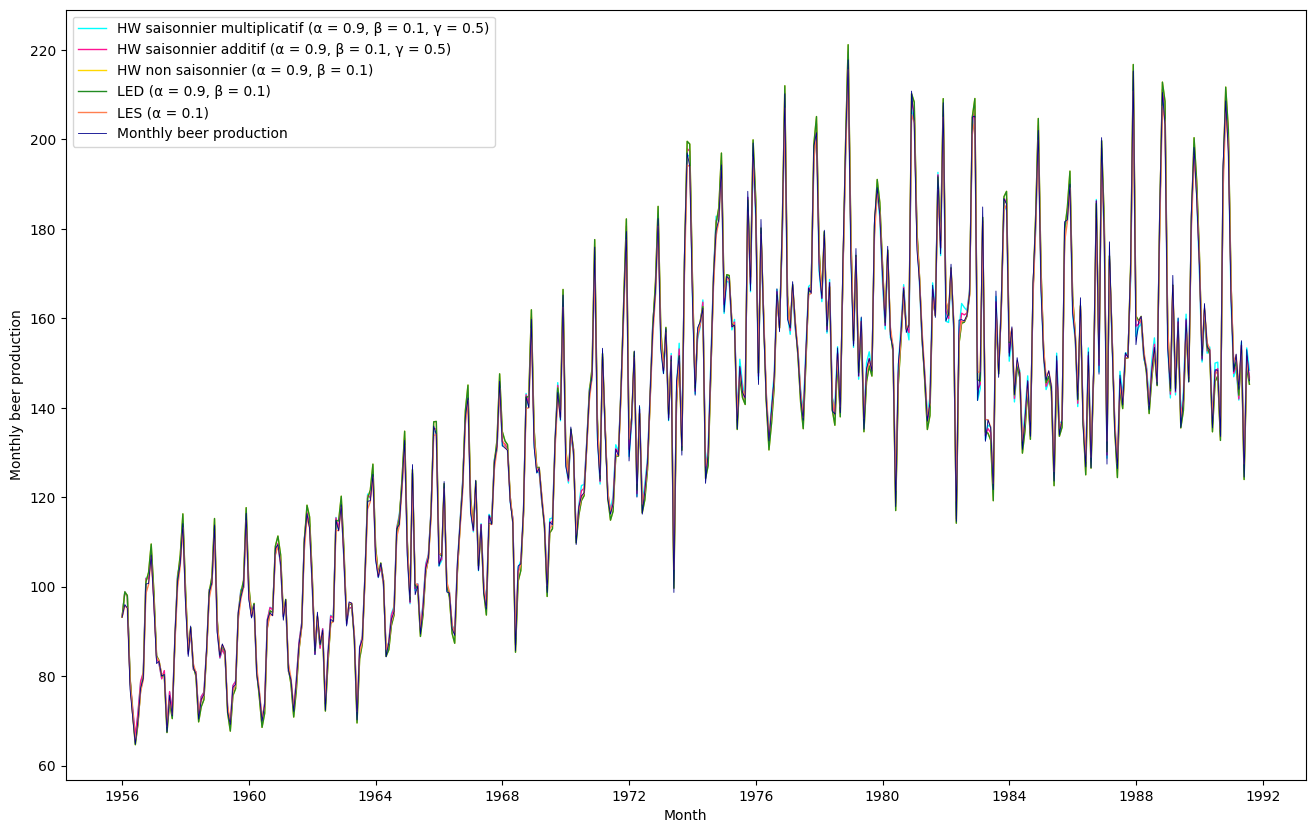

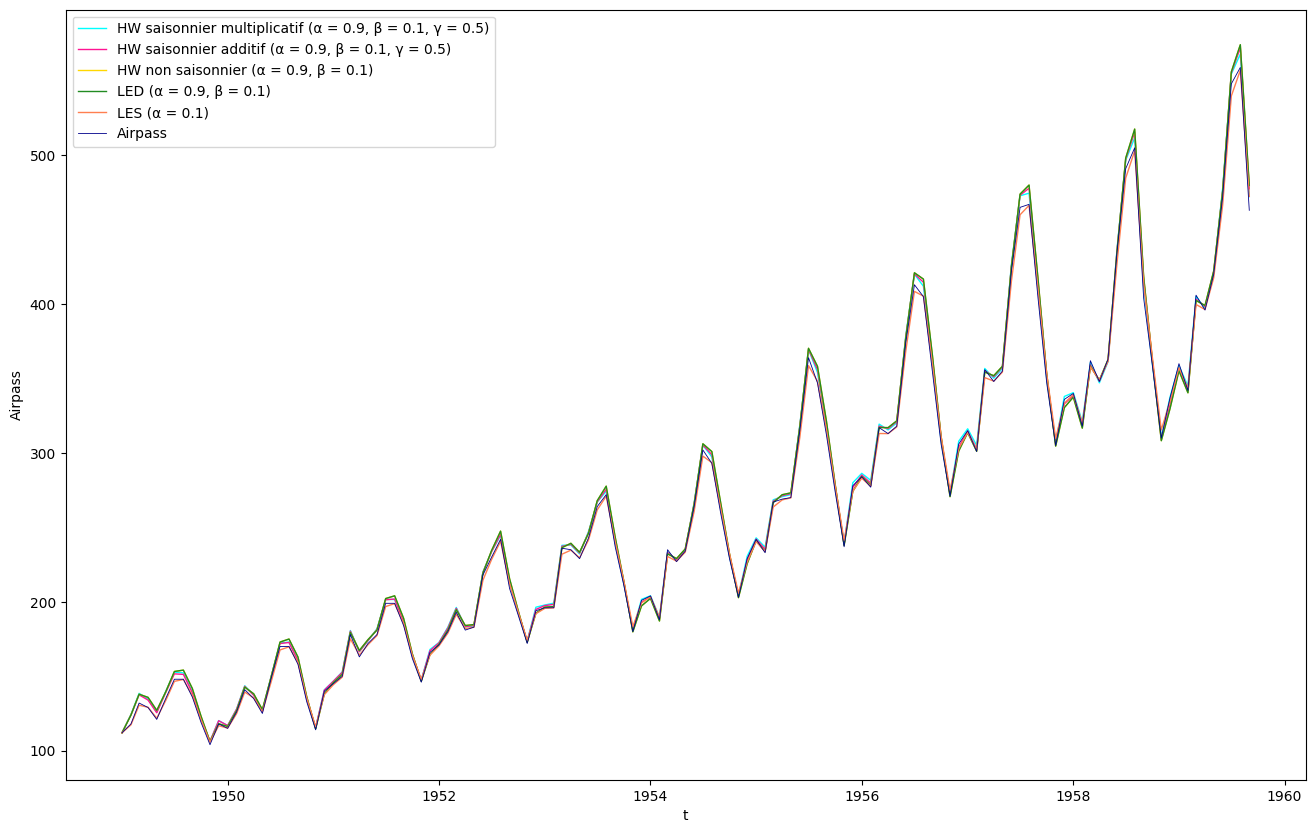

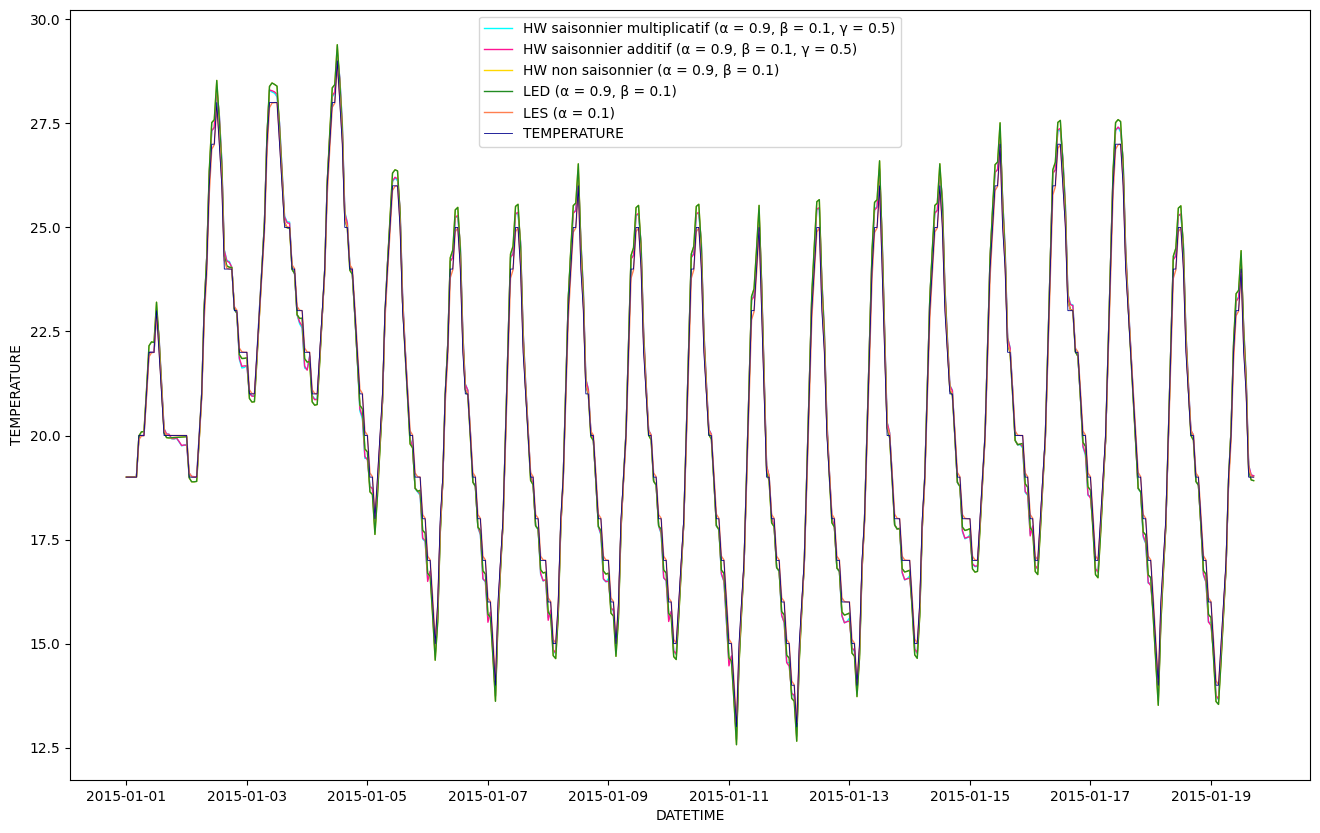

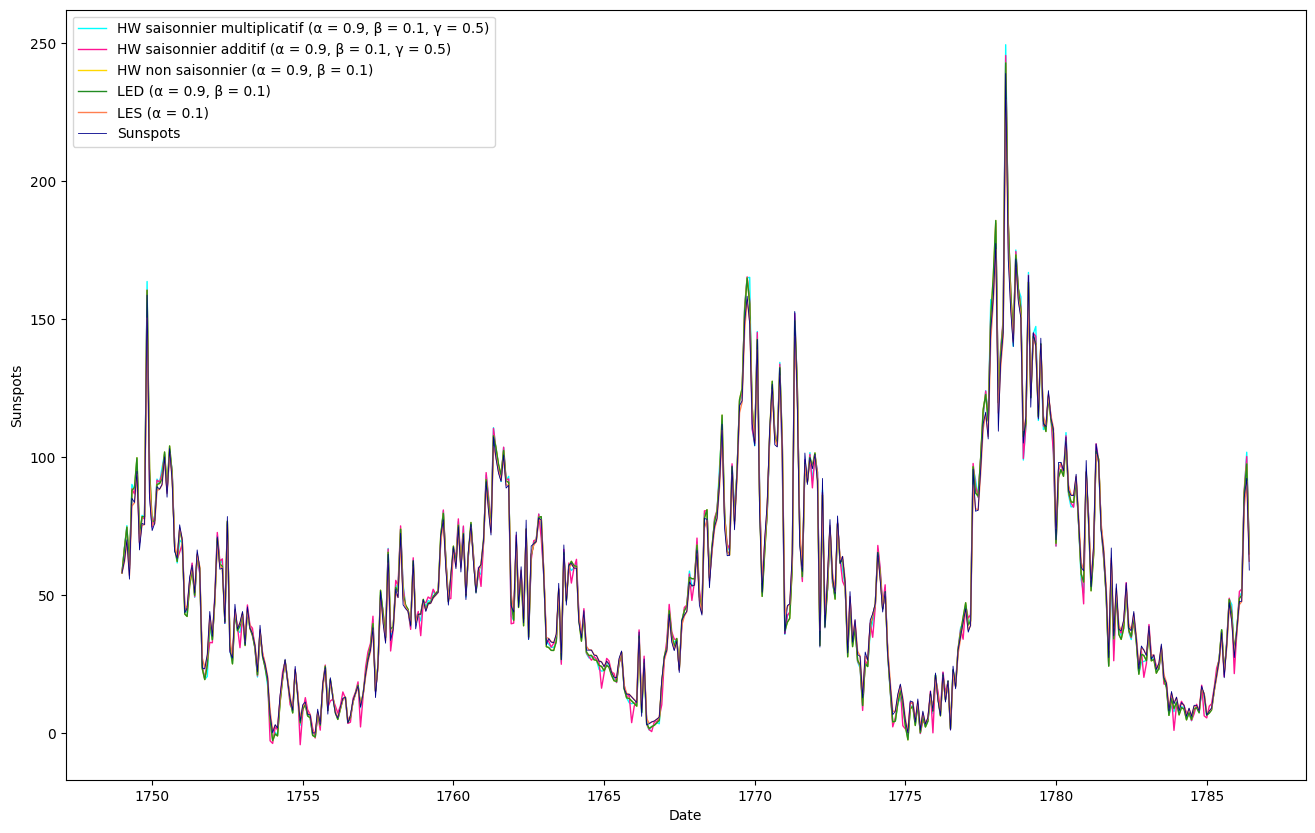

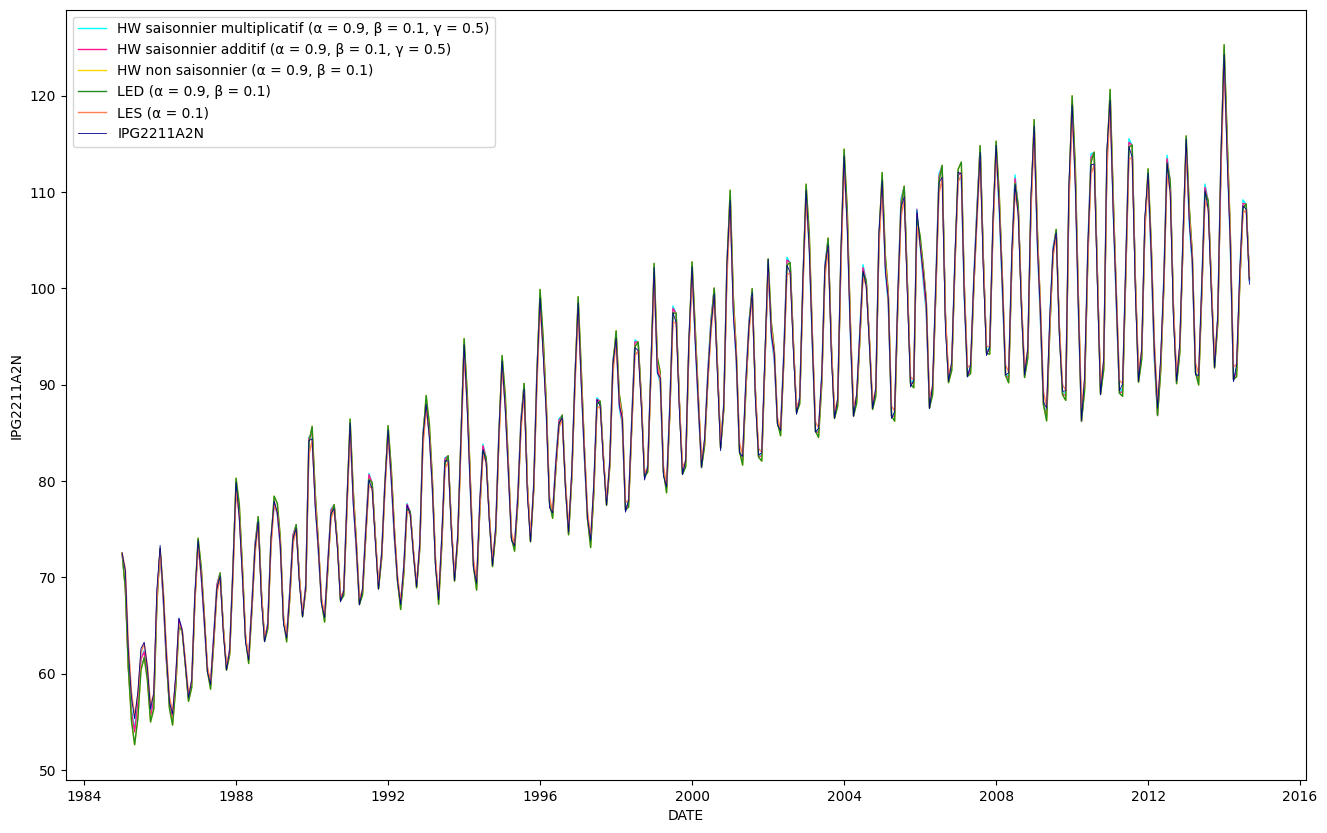

In [ ]:
# i = 1
# plt.figure(figsize=(16, 32))
# plt.title('Lissage exponentiel simple, double et triple')
# plt.xticks([])
# plt.yticks([])
for ds in used_test_set_att:
    # ax = plt.subplot(5, 1, i)
    plt.figure(figsize=(16, 10))
    plt.plot(pd.to_datetime(used_train_set_att[ds][used_train_set_att[ds].columns[0]]), best_alpha_forecasts_HWSM[ds][ds], linewidth=1, label=f"HW saisonnier multiplicatif (α = {best_alpha_HWSM[ds]}, β = {best_beta_HWSM[ds]}, γ = {best_gamma_HWSM[ds]})", c="aqua")
    plt.plot(pd.to_datetime(used_train_set_att[ds][used_train_set_att[ds].columns[0]]), best_alpha_forecasts_HWSA[ds][ds], linewidth=1, label=f"HW saisonnier additif (α = {best_alpha_HWSA[ds]}, β = {best_beta_HWSA[ds]}, γ = {best_gamma_HWSA[ds]})", c="deeppink")
    plt.plot(pd.to_datetime(used_train_set_att[ds][used_train_set_att[ds].columns[0]]), best_alpha_forecasts_HWNS[ds][ds], linewidth=1, label=f"HW non saisonnier (α = {best_alpha_HWNS[ds]}, β = {best_beta_HWNS[ds]})", c="gold")
    plt.plot(pd.to_datetime(used_train_set_att[ds][used_train_set_att[ds].columns[0]]), best_alpha_forecasts_DEM[ds][ds], linewidth=1, label=f"LED (α = {best_alpha_DEM[ds]}, β = {best_beta_DEM[ds]})", c="forestgreen")
    plt.plot(pd.to_datetime(used_train_set_att[ds][used_train_set_att[ds].columns[0]]), best_alpha_forecasts_SEM[ds][ds], linewidth=1, label=f"LES (α = {best_alpha_SEM[ds]})", c="coral")
    plt.plot(pd.to_datetime(used_train_set_att[ds][used_train_set_att[ds].columns[0]]), used_train_set_att[ds][ds], linewidth=0.6, label=ds, c='darkblue')
    plt.legend()
    plt.xlabel(used_train_set_att[ds].columns[0])
    plt.ylabel(ds)
    # i = i + 1

plt.show()